## Cargar librerias

In [2]:
!pip install neurolab

     |████████████████████████████████| 645 kB 2.2 MB/s 
  Created wheel for neurolab: filename=neurolab-0.3.5-py3-none-any.whl size=22179 sha256=a16ee9a69524ff873c625230fed498960e58f0362564588102777f576e617afc
  Stored in directory: /root/.cache/pip/wheels/3e/07/63/e3d6e066089d7186465184a6f9a1884471485f38beef1edeaa
Successfully built neurolab


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl


## Cargar los datos



In [4]:
data = np.loadtxt('data_simple_nn.txt')
print(data)

[[1.  4.  0.  0. ]
 [1.1 3.9 0.  0. ]
 [1.2 4.1 0.  0. ]
 [0.9 3.7 0.  0. ]
 [7.  4.  0.  1. ]
 [7.2 4.1 0.  1. ]
 [6.9 3.9 0.  1. ]
 [7.1 4.2 0.  1. ]
 [4.  1.  1.  0. ]
 [4.1 0.9 1.  0. ]
 [4.2 1.1 1.  0. ]
 [3.9 0.8 1.  0. ]
 [4.  7.  1.  1. ]
 [4.2 7.2 1.  1. ]
 [3.9 7.1 1.  1. ]
 [4.1 6.8 1.  1. ]]


In [5]:
data.shape

(16, 4)

Separamos entradas y salidas

In [6]:
#Entrada
X = data[:,0:2]
print(X)

[[1.  4. ]
 [1.1 3.9]
 [1.2 4.1]
 [0.9 3.7]
 [7.  4. ]
 [7.2 4.1]
 [6.9 3.9]
 [7.1 4.2]
 [4.  1. ]
 [4.1 0.9]
 [4.2 1.1]
 [3.9 0.8]
 [4.  7. ]
 [4.2 7.2]
 [3.9 7.1]
 [4.1 6.8]]


In [7]:
#Salida
y = data[:,2:]
print(y)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


Text(0.5, 1.0, 'Datos de Entrada')

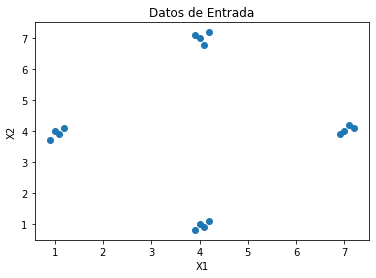

In [8]:
#Gráficos de data
plt.figure()
plt.scatter(data[:,0],data[:,1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Datos de Entrada')

###Definir el mínimo y máximo para cada entrada

In [9]:
x1_min, x1_max = data[:,0].min(), data[:,0].max()

In [11]:
x2_min, x2_max = data[:,1].min(), data[:,1].max()

In [12]:
print(x1_min,x1_max,x2_min,x2_max)

0.9 7.2 0.8 7.2


## Numero de neuronas en la capa de salida

In [13]:
num_salidas = y.shape[1]
print(num_salidas)

2


###Definir un perceptron con 2 neuronas de entrada y 2 de salida

In [14]:
x1 = [x1_min,x1_max]
x2 = [x2_min,x2_max]
perceptron = nl.net.newp([x1,x2],num_salidas)

## Entrenar el perceptron usando la data

In [17]:
progreso_error = perceptron.train(X,y,epochs=1000,show=20,lr=0.03)

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
Epoch: 60; Error: 4.0;
Epoch: 80; Error: 4.0;
Epoch: 100; Error: 4.0;
Epoch: 120; Error: 4.0;
Epoch: 140; Error: 4.0;
Epoch: 160; Error: 4.0;
Epoch: 180; Error: 4.0;
Epoch: 200; Error: 4.0;
Epoch: 220; Error: 4.0;
Epoch: 240; Error: 4.0;
Epoch: 260; Error: 4.0;
Epoch: 280; Error: 4.0;
Epoch: 300; Error: 4.0;
Epoch: 320; Error: 4.0;
Epoch: 340; Error: 4.0;
Epoch: 360; Error: 4.0;
Epoch: 380; Error: 4.0;
Epoch: 400; Error: 4.0;
Epoch: 420; Error: 4.0;
Epoch: 440; Error: 4.0;
Epoch: 460; Error: 4.0;
Epoch: 480; Error: 4.0;
Epoch: 500; Error: 4.0;
Epoch: 520; Error: 4.0;
Epoch: 540; Error: 4.0;
Epoch: 560; Error: 4.0;
Epoch: 580; Error: 4.0;
Epoch: 600; Error: 4.0;
Epoch: 620; Error: 4.0;
Epoch: 640; Error: 4.0;
Epoch: 660; Error: 4.0;
Epoch: 680; Error: 4.0;
Epoch: 700; Error: 4.0;
Epoch: 720; Error: 4.0;
Epoch: 740; Error: 4.0;
Epoch: 760; Error: 4.0;
Epoch: 780; Error: 4.0;
Epoch: 800; Error: 4.0;
Epoch: 820; Error: 4.0;
Epoch: 840; Error: 4

###Gráfico del progreso de entrenamiento 

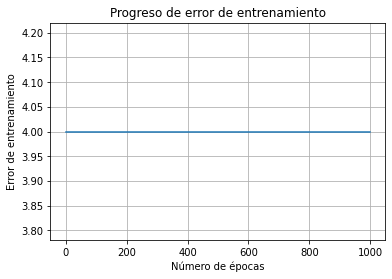

In [18]:
plt.figure()
plt.plot(progreso_error)
plt.xlabel('Número de épocas')
plt.ylabel('Error de entrenamiento')
plt.title('Progreso de error de entrenamiento')
plt.grid()

In [19]:
print('\nResultados de Prueba:')
datos_prueba = [[1,4],[4,7]]
for item in datos_prueba:
  print(item, '--->',perceptron.sim([item]))


Resultados de Prueba:
[1, 4] ---> [[1. 0.]]
[4, 7] ---> [[1. 1.]]


## Guardar y cargar una red neuronal entrenada

In [20]:
# Save network in file
perceptron.save('perceptron.net')
# Load network
# net = nl.load('test.net')